# Lineární klasifikace

Úkolem cvičení je naprogramovat lineární klasifikátor, který bude rozpoznávat kočky.

Budeme potřebovat následující knihovny:
- numpy ... známá knihovna pro práci s vektory a maticemi, velmi podobná MATLABu
- matplotlib.pyplot ... nabízí vykreslovací funkcionalitu rovněž velmi podobnou MATLABu
- pickle ... standardní knihovna pro rychlé ukládání a načítání objektů
- tqdm ... vykresluje během výpočtů progress bar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tqdm

plt.rcParams['figure.figsize'] = (12., 8.)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## numpy vs MATLAB

Všechny matice, vektory, i vícerozměrné tensory v numpy jsou typu `numpy.ndarray` (*n*-dimenzionální pole). Incializují se podobně jako v MATLABu:

In [2]:
# vektor 3 nul, vychozi dat. typ je double (float64)
np.zeros(3)

array([0., 0., 0.])

In [3]:
# vektor 4 jednicek a typu 8-bit integer
np.ones((4,), dtype=np.uint8)

array([1, 1, 1, 1], dtype=uint8)

Numpy se MATLABu velice podobá, ale několik rozdílů najdeme. Už v předcházejícím příkladu se chová jinak. V MATLABu by totiž příkaz `zeros(3)` namísto vektoru 3 nul vytvořil 3x3 *matici* nul.

### Manuální inicializace

Manuální inicializace se provádí příkazem `np.array`. Funkce převezme standardní pythonovské pole a automaticky ho převede na `np.ndarray`.

*Pozn.*: V jupyter notebooku se při spuštění buňky (cell) vždy vypíše do konzole výsledek posledního příkazu. V MATLABu se takto vypisují všechny příkazy, které nekončí středníkem. Středník se používá steně i zde, ovšem význam má pouze u posledního příkazu.

In [4]:
a = np.array([7, 6, 1, 5, 3, 4, 2, 1, 2, 8, 9])
a

array([7, 6, 1, 5, 3, 4, 2, 1, 2, 8, 9])

### Přístup k prvkům

Dalším zásadním rozdílem oproti MATLABu je, že **numpy indexuje od nuly**, zatímco MATLAB od jedničky.

In [5]:
a[0], a[1], a[2]

(7, 6, 1)

Tzv. slicing, aneb přístup k více prvkům najednou:

In [6]:
# od zacatku do 3; posledni NENI zahrnut
a[:3]

array([7, 6, 1])

In [7]:
# od 7 (tedy od 8. prvku) dale
a[7:]

array([1, 2, 8, 9])

In [8]:
# od 2 do predposledniho po 3
a[2:-1:3]

array([1, 4, 2])

In [9]:
# vsechny, ale pozpatku
a[::-1]

array([9, 8, 2, 1, 2, 4, 3, 5, 1, 6, 7])

In [10]:
# manualni vyber
a[[2, 3, 0, 6, -1]]

array([1, 5, 7, 2, 9])

### Matice

Dalším, zásadnějším rozdílem mezi MATLABem a numpy je, že **v numpy jsou vektory jednorozměrné pole**, zatímco v MATLABu jsou to matice s jedním řádkem či sloupcem. Nelze tedy indexovat dvěma souřadnicemi jako v MATLABu:

In [11]:
a[0, 2]

IndexError: too many indices for array

**Matice** se inicalizují obdobně. Namísto jednoho čísla udávajícího počet prvků zadáme počet řádků a sloupců jako pythonovskou n-tici (`tuple`).

In [12]:
# matice s 3 radky a 2 sloupci na nuly:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

Při manuální iniclizaci se do funkce `np.array` zadává pole polí:

In [13]:
A = np.array([
    [1, 4, 2],
    [5, 3, 6],
])

print(A.shape, A.dtype)
print(A)

(2, 3) int32
[[1 4 2]
 [5 3 6]]


Inicializace matice s 3 radky a 2 sloupci na náhodné hodnoty. Pozn.: všimněme si drobné nekonzistence v numpy, kdy funkce jako zeros či ones přebírají rozměry jako `tuple`, zatímco `rand` a `randn` postupně jako argumenty funkce.

Podobně jako v MATLABu **první souřadnice je vždy řádek, druhý sloupec**.

In [14]:
# druhy radek, treti sloupec
A[1, 2]

6

V Pythonu lze indexovat i od konce tak, že použijeme záporné znaménko. Numpy tuto funkcionalitu také implementuje.

In [15]:
A[-1, 1]

3

In [16]:
# nahodne hodnoty z gaussovskeho (normalniho) rozlozeni
R = np.random.randn(3, 2)
R

array([[-0.06996666, -0.29425928],
       [ 0.22504892,  1.18835347],
       [-0.60878098, -0.07861084]])

In [17]:
# nahodne hodnoty z rovnomerneho rozlozeni (na konci neni n) 0 ... 1
np.random.rand(3, 2)

array([[0.23500069, 0.4597572 ],
       [0.02728943, 0.59908453],
       [0.79760296, 0.26678505]])

### náhled vs kopie: pozor!

V numpy se při indexování defaultně vrací *náhled* do pole, nikoliv kopie. Pokud tedy něco změníte, změna se projeví i v původním poli. Např.:

In [18]:
row = R[0, :]
row[-1] = 10.
print(R)

[[-0.06996666 10.        ]
 [ 0.22504892  1.18835347]
 [-0.60878098 -0.07861084]]


V následujícím se ale toto nestane:

In [19]:
row = R[0, :]
row = np.random.randn(2)
print(R)

[[-0.06996666 10.        ]
 [ 0.22504892  1.18835347]
 [-0.60878098 -0.07861084]]


První řádek se nezmění, protože proměnné `r`, která je jako všechny proměnné v Pythonu pouhou referencí, byl prostě jen přiřazen nový objekt, který bude cílem odkazu. S původními hodnotami se tedy nijak nemanipulovalo. Přepisu celého řádku dosáhneme např. takto:

In [20]:
row = R[0, :]
row[:] = np.random.randn(2)
# R[0, :] = np.random.randn(2)
print(R)

[[ 1.00763878 -0.55607255]
 [ 0.22504892  1.18835347]
 [-0.60878098 -0.07861084]]


## Data

Způsob načítání dat kompletně závisí na způsobu, jakým byla uložena. Zde použijeme populární dataset CIFAR-10, který často slouží jako základní benchmark pro porovnání přínosu nových algoritmů vůči stávajícím. Úkolem je klasifikace obrázků do jedné z 10 tříd.

In [21]:
# CIFAR-10 obsahuje nasledujici tridy
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# training set obsahuje celkem 50000 RGB obrazku o rozmerech 32x32 pixelu
X_all = np.zeros((50000, 32, 32, 3), dtype=np.uint8)
y_all = np.zeros(50000, dtype=np.int32)

# dataset je rozdelen do 6 souboru, z nichz 5 je trenovaci mnozina
for i in range(5):
    batch_file = 'data/cifar-10-batches-py/data_batch_' + str(i + 1)
    with open(batch_file, 'rb') as f:
        # CIFAR-10 je dostupny pro Python 2.7 ve formatu `pickle`, pri jeho nacitani
        # proto musime explicitne specifikovat typ kodovani
        data = pickle.load(f, encoding='latin1')
        X_all[10000 * i:10000 * (i+1)] = data['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
        y_all[10000 * i:10000 * (i+1)] = data['labels']

# z training setu ukrojime cast na validaci
num_train, num_valid = 40000, 10000
X_train, y_train = X_all[:num_train], y_all[:num_train]
X_valid, y_valid = X_all[num_train:], y_all[num_train:]

x_dim = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]

In [22]:
print(type(X_train), X_train.shape, X_train.dtype)
print(type(y_train), y_train.shape, y_train.dtype)
print(y_train[:10])

<class 'numpy.ndarray'> (40000, 32, 32, 3) uint8
<class 'numpy.ndarray'> (40000,) int32
[6 9 9 4 1 1 2 7 8 3]


Pro každou třídu vykreslíme 10 příkladů, abychom viděli, jak data vlastně vypadají. Použijeme k tomu knihovnu `matplotlib.pyplot`.

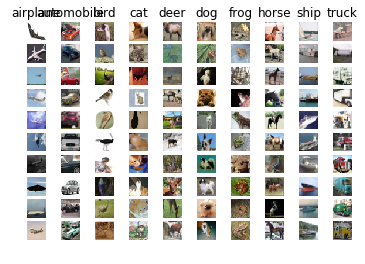

In [23]:
for i, cls in enumerate(classes):
    # chceme pouze obrazky aktualni tridy a z nich nahodne vybereme 10
    cls_ids, = np.where(y_train == i)
    draw_ids = np.random.choice(cls_ids, size=10)
    
    # pyplot podobne jako MATLAB nabizi funkci subplot pro vykresleni vice grafu do jednoho okna
    for j, k in enumerate(draw_ids):
        # vykresli 10x10 obrazku, poradi je po radcich, ovsem my budeme vykreslovat po sloupcich,
        # tj. kazdy sloupec bude obsahovat 10 prikladu jedne ze trid
        plt.subplot(10, 10, j * 10 + i + 1)
        
        # vyresli obrazek
        plt.imshow(X_train[k])
        
        # nevykresluj popisky os
        plt.axis('off')
        
        # v prvnim radku pridame nazev grafu (obrazku)
        if j == 0:
            plt.title(cls)
plt.show()

## Lineární klasifikátor

Úkolem cvičení je naprogramovat lineární klasifikátor obrázků. V přednášce jsme si ukázali dvě populární volby:
1. logistická regrese (softmax)
2. support vector machine (svm)

Vyzkoušíme si oba. Začneme první variantou.

Lineární klasifikace je založena na skalárních součinech vektorů V numpy se jak pro skalární součin vektorů i násobení matic používá stejná funkce: `np.dot`. Např. násobení dvou vektorů:
Pozn.: do většiny numpy funkcí můžeme předat i standardní pythonovské pole a dojde k automatické konverzi.

In [24]:
# operace 2*5 + 3*3 + 4*1
np.dot([2, 3, 4], [5, 3, 1])

23

V případě matice se skalární součin s vektorem napravo provede pro každý řádek, což odpovídá definici násobení matice a vektoru, kde vektor je sloupcový. Toto opakování stejné operace pro více řádků či sloupců se nazývá broadcasting a je stěžejní součástí knihovny numpy a obecně psaní efektivního vektorizovaného kódu.

In [25]:
# dva radky:
# 2*5 + 3*3 + 4*1
# (-1)*5 + (-2)*3 + (-3)*1
np.dot([[2, 3, 4], [-1, -2, -3]], [5, 3, 1])

array([ 23, -14])

Nakonec matice x matice. Všimněme si, že musí sedět rozměry tak, aby šlo matice násobit! Jelikož je druhý operand dvourozměrný, musí být původní vektor (5, 3, 1) zapsán skutečně jako sloupec. Druhý sloupec pak je (-4, -2, 0).

In [26]:
np.dot([[2, 3, 4], [-1, -2, -3]], [[5, -4], [3, -2], [1, 0]])

array([[ 23, -14],
       [-14,   8]])

## Pomocné funkce

Pro trénování a validaci se bude hodit zabalit některé části kódu do funkcí, protože se často opakují. Zadefinujeme si proto následující funkce.

In [27]:
def preprocess(rgb):
    """
    funkce prevede na datovy typ np.float, znormalizuje do 0...1 rozsahu a odecte prumernou hodnotu
    """
    x = rgb / 255.
    x -= x.mean(axis=(0, 1))
    return x

## Softmax

### Inicializace

- váhy `W` inicializujeme náhodně
- bias na nulu

Obrázky budeme považovat za vektory, tzn. že za sebe seřadíme RGB hodnoty z řádků a sloupců do jednoho pole. Tím se z trénovacích dat efektivně stane matice s rozměry `počet_obr × (počet_pixelů * 3)`.

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [156]:
W_softmax = np.random.rand(32*3*32,10)
b_softmax = np.zeros(10)

### Trénování

Připomeňme, že logistická regrese je jednoduchý lineární klasifikátor s parametry:

- $W$ ... váhová matice o rozměrech `rozměr_vstupu x počet_tříd`
- $b$ ... bias vektor o rozměru `počet_tříd`

Pokud máme na vstupu obrázek $x$, pravděpodobnost, že na něm je objekt třídy $c$ je predikována jako
$$p_c = \frac{\exp{w_c^\top x}}{\sum_{i=0}^{C-1}\exp{w_i^\top x}}$$
kde $w_c$ je $c$-tý řádek matice $W$ a $C$ je celkový počet tříd.

Zda byla predikce dobrá nebo ne určí kriteriální funkce (loss), tzv. cross entropy, která ve speciálním případě klasifikace má tvar
$$L = -\log p_y$$
kde $y$ index třídy, do které obrázek ve skutečnosti patří.

Vzorec pro gradient na $c$-tý řádek váhové *matice* je
$$\frac{\partial L}{\partial w_c} = \left(p_c - \boldsymbol{1}(c=y)\right)x + 2\lambda w_c$$
a $c$-tý prvek bias *vektoru*
$$\frac{\partial L}{\partial b_c} = p_c - \boldsymbol{1}(c=y)$$

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [164]:
%%time

learning_rate = 0.0001
num_iters = num_train
l2_decay = 0.2

num_correct = 0
loss = 0
l2_val = 0


for n in tqdm.tnrange(num_iters):
    # obrazek vybereme nahodne
    idx = np.random.choice(num_train)
    
    # ziskame data
    xn = preprocess(X_train[idx]).ravel()
    yn = y_train[idx]
    
    # dopredny pruchod: linearni skore, sigmoida a loss
    score = np.dot(W_softmax.T,xn) + b_softmax
    prob = np.exp(score)/np.sum(np.exp(score))
    loss += -np.log(prob[yn])
    
    # l2_val += sum(np.power(W_softmax,2))
    # gradient na vahy a bias
    dscore = prob.copy()
    dscore[yn] -= 1
    
    dW = np.dot(xn[:, None], dscore[None, :]) + 2. * l2_decay * W_softmax 
    db = dscore
 
    # update parametru
    W_softmax -= learning_rate * dW
    b_softmax -= learning_rate * db
    
    # vyhodnoceni uspesnosti

    if yn == np.argmax(prob):
        num_correct += 1
        
print('train accuracy: {}/{} = {:.1f} %'.format(num_correct, num_iters, 100. * num_correct / num_iters))
print(loss / num_iters, l2_val / num_iters)

HBox(children=(IntProgress(value=0, max=40000), HTML(value='')))


train accuracy: 11844/40000 = 29.6 %
2.071693685165244 [0.02524335 0.06072945 0.01856342 0.01995672 0.01504364 0.03054884
 0.02279617 0.03470703 0.03368438 0.05003074]
Wall time: 4min 25s


### Validace


Natrénovaný klasifikátor ověříme na validační (development) množině. Ideálně bychom měli dosáhnout stejné úspěšnosti jako na trénovací sadě, pravděpodobně tomu tak ale nebude. Proč?

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [165]:
%%time

num_correct = 0

for n in tqdm.tnrange(num_valid):   
    idx = np.random.choice(num_valid)
    
    # ziskame data
    xn = preprocess(X_valid[idx]).ravel()
    yn = y_valid[idx]
    
    # dopredny pruchod: linearni skore, sigmoida a loss
    score = np.dot(xn,W_softmax) + b_softmax
    
    # vyhodnoceni uspesnosti
    if yn == np.argmax(prob):
        num_correct += 1

print('val accuracy: {}/{} = {:.1f} %'.format(num_correct, num_valid, 100. * num_correct / num_valid))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


val accuracy: 954/10000 = 9.5 %
Wall time: 1.99 s


## Weston-Watkins SVM

Jak jsme si ukázali v přednášce, SVM je softmaxu velmi podobné. Z pohledu neuronových sítí se liší pouze způsobem výpočtu lossu - místo cross entropy použijeme hinge loss definovaný jako
$$L = \sum_{c\ne y}\max(0, 1 + s_c - s_y)$$
kde $s$ je vektor lineárních skóre $s=Wx + b$.

Gradient na váhy pak je
$$\frac{\partial L}{\partial w_y} = -\sum_{c\ne y}\boldsymbol{1}(1 + s_c - s_y > 0)x$$
$$\frac{\partial L}{\partial w_{c\ne y}} = \boldsymbol{1}(1 + s_c - s_y > 0)x$$
a pro biasy podobně, pouze bez $x$.

### Inicializace

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [ ]:
W_svm = np.random.rand(32*3*32,10)
b_svm = np.zeros(10)

### Trénování

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [ ]:
%%time

learning_rate = 0.001
num_iters = 40000
l2_decay = 0.01

num_correct = 0
loss = 0.
l2_val = 0.

for n in tqdm.tnrange(num_iters):
    # obrazek vybereme nahodne
    idx = np.random.choice(num_train)
    
    # ziskame data
    xn = preprocess(X_train[idx]).ravel()
    yn = y_train[idx]
    
    # dopredny pruchod: linearni skore, sigmoida a loss
    score = ...
    margin = 1 + score - score[yn]
    margin[yn] = 0.
    loss += ...
    l2_val += ...
    
    # gradient na vahy a bias
    db = (margin > 0.).astype(np.float)
    db[yn] = -np.sum(db)
    dW = np.dot(xn[:, None], db[None, :])
    dW += 2. * l2_decay * W_svm
    
    # update parametru
    W_svm -= ...
    b_svm -= ...
    
    # vyhodnoceni uspesnosti
    if ...:
        num_correct += 1

print('train accuracy: {}/{} = {:.1f} %'.format(num_correct, num_iters, 100. * num_correct / num_iters))
print(loss / num_iters, l2_val / num_iters)

### Validace

<font color=red>**TODO: SAMOSTATNĚ**</font>

In [ ]:
%%time

num_correct = 0

for n in tqdm.tnrange(num_valid):   
    # ziskame data
    xn = ...
    yn = ...
    
    # dopredny pruchod: linearni skore, sigmoida a loss
    score = ...
    
    # vyhodnoceni uspesnosti
    if ...:
        num_correct += 1

print('val accuracy: {}/{} = {:.1f} %'.format(num_correct, num_valid, 100. * num_correct / num_valid))